# Typical Application Circuit
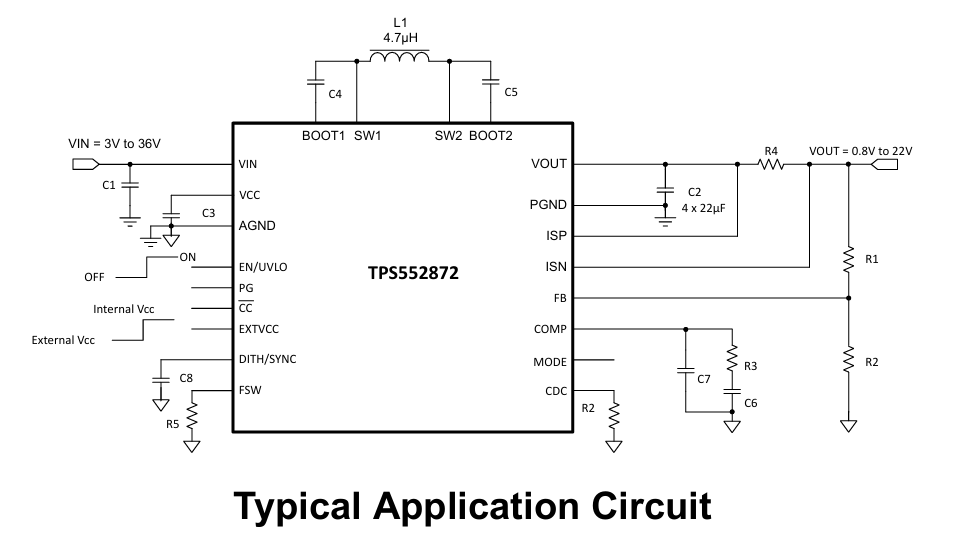

# Functional Block Diagram
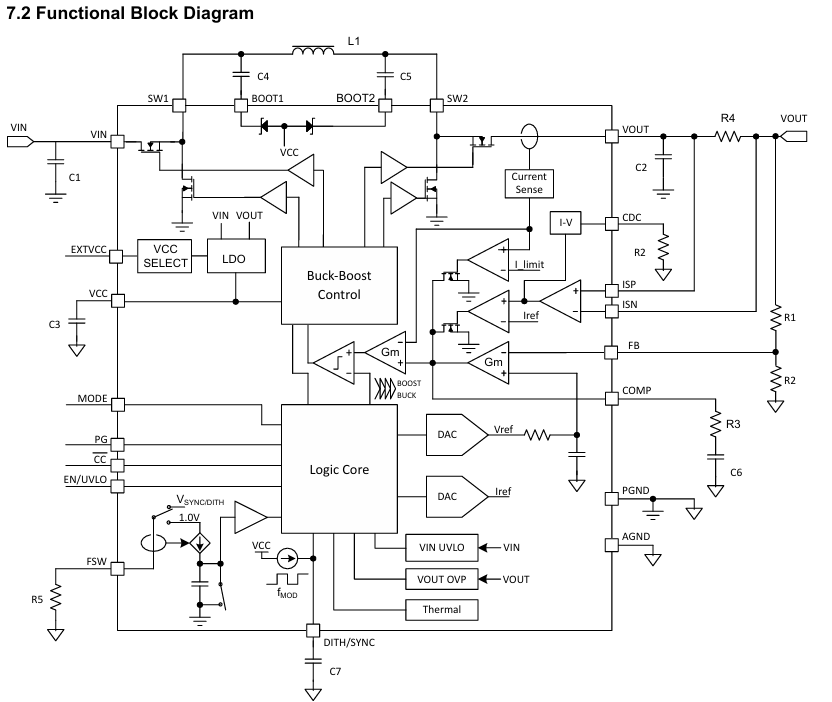

# Loop Compensation
- uses average current control scheme
- inner current loop uses internal compensation and requires the inductor value to be larger than $1.2/f_{sw}$
- ***I am using a switching frequency of 2MHz and an inductor value of 2.2uH

In [3]:
fsw = 2*10**6 # Converter switching frequency
L = 2.2*10**-6 # Converter inductor value
print("The inductor value is: ", L)
print(f"1.2/fsw is {1.2/fsw}")
if  L > 1.2/fsw:
    print("Inductor value is larger than 1.2/fsw")
else:
    print("Inductor value is less than 1.2/fsw")

The inductor value is:  2.2e-06
1.2/fsw is 6e-07
Inductor value is larger than 1.2/fsw


- the COMP pin is the output of the internal voltage error amplifier
- An external compensationnetwork comprised of a resistor and cernamic capacitors is connected to the comp pin
- both buck and boost mode require loop compensation
- the boost mode compensation is more restrictive due to the presence of a right half plane zero (RHPZ), and is therefore selected as the overall compensation from a loop stability point of view
- $R_C = \frac{2\pi V_{OUT} R_{SENSE} C_{OUT} f_C}{(1-D) V_{REF} G_{EA}}$
- $C_C = \frac{R_{LOAD} C_{OUT}}{2 R_C}$
- $C_P = \frac{R_{COUT} C_{OUT}}{R_C}$
- where:
  - $R_{SENSE}$ is the equivalent internal current sense resistor, which is $55 m\ohm$
  - $C_{OUT}$ is the effective output capacitance
    - **Will use 100uF
  - $f_C$ is the selected crossover frequency
    - This is where the open loop gain is 1 or 0dB
    - The higher in frequency that the loop gain says above 0dB before corssing over, the faster the loop response
    - Generally accepted that loop gain corss over frequency should be no higher than the lower of either 1/10 of the switching frequency, or 1/5 of the RHPZ frequency

## Calculation Justification
### Issues
- https://chatgpt.com/c/6787f80f-2964-800b-9127-9d4506fc669f
- There is no single $f_{RHPZ}$ that will be valid for all conditions in my setup because the RHPZ frequency depends on parameters that vary with input voltage, output voltage and load resistance
- $f_{RHPZ} = \frac{R_{LOAD} (1-D)^2}{2\pi L}$
  - $R_{load} = \frac{V_{OUT}}{I_{OUT}}$
  - $D = \frac{V_{OUT}}{V_{OUT} + V_{IN}}$ (Buck-Boost approximation)
  - $D = \frac{V_{OUT} - V_{IN}}{V_{OUT}}$ (Boost approximation)
### Practical Solution
- Since the RHPZ varies across all operating conditions, the $f_C$ must be selected conservatively to ensure stability under all conditions
- Approach:
  1. Calculate $f_{RHPZ}$ for **Worst-Case Scenarios:**
     - Determine $f_{RHPZ}$ for lowest expected load resistance (maximum output current)
     - Also, calculate $f_{RHPZ}$ for the highest expected output voltage, as this typically results in a higher duty cycle and thus a lower $f_{RHPZ}$
  2. Set $f_C$ as a **Fraction of the Minimum** $f_{RHPZ}$:
     - use the lowest of $f_{RHPZ}$ to determine $f_C$
     - Common guideline is $f_c < f_{RHPZ}/5$

In [11]:
import math
## The lowest expected load resistance is 100 ohms, and the maximum output current is 5A
# According to the data sheet, the buck boost converter can deliver 30W from a 12V input and 25W from a 9V input
# Will assume linear V_in-W relation
#Let
w1 =30; v1 = 12; w2 = 25; v2 = 9
m = (w1-w2)/(v1-v2)
b = w1 - v1*m
print("Assuming Linear V_in-W relation (IN BOOST MODE)")
print(f"The equation is W = {m}*V + {b}")

#Max o

VinMax = 17
WMax = m*VinMax+10
print(f"The Maximim power the converter can output is WMAX({VinMax}) = {WMax} Watts")

VinMin = 3
WMin = m*VinMin+10
print(f"The Minimum pwer the converter can output is WMIN({VinMin}) = {WMin} Watts")

"""
RLoad = 100
D = 0.85
fRHPZ = (RLoad*(1-D)**2)/(2*math.pi*L)
print(fRHPZ)
print(fRHPZ/5)
"""

Assuming Linear V_in-W relation (IN BOOST MODE)
The equation is W = 1.6666666666666667*V + 10.0
The Maximim power the converter can output is WMAX(17) = 38.333333333333336 Watts
The Minimum pwer the converter can output is WMIN(3) = 15.0 Watts


'\nRLoad = 100\nD = 0.85\nfRHPZ = (RLoad*(1-D)**2)/(2*math.pi*L)\nprint(fRHPZ)\nprint(fRHPZ/5)\n'